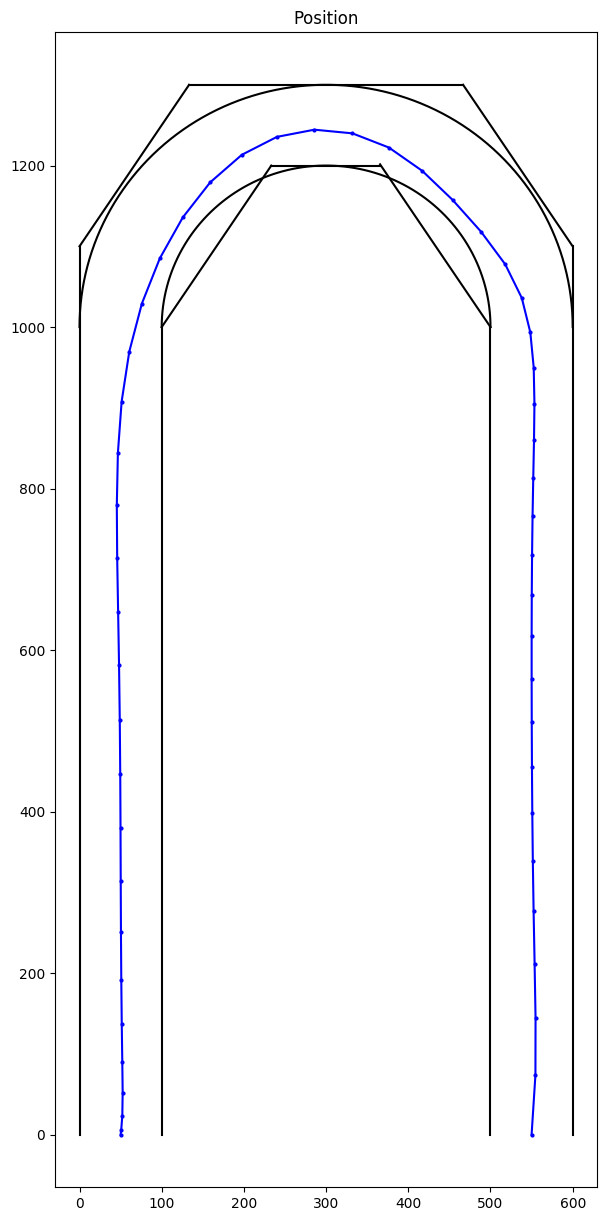

Academic license - for non-commercial use only


In [176]:
using JuMP, Gurobi, Mosek, PyPlot
coflo = 0.2 #coeffecient of friction longitudnal(in direction of motion)
cofla = 0.4 #coeffecient of friction lattitudnal(perpendicular to direction of motion of the front tyers when they turn)


## car specs all specs in meters and seconds
# mass = 1000 # in kg
g = 9.8  # gravitational pull in m/sec^2
maxacc = 14.2  # max acc in m/sec^2
maxv = 103.5 # max velocity in m/sec equivalent to 200km/hr
maxTu = 1.27 #max steer one side

k = 52
startPos = [50,0]
finishPos = [550, 0]
startVel = [0,0]
finishVel = [0,0]
finishAcc = [0,0]


    # define waypoints
    m = Model(solver = GurobiSolver(OutputFlag=0))
#     m = Model(solver = MosekSolver(LOG=0))
    
    @variable(m, P[1:2,1:k])  # resulting position in x,y
    @variable(m, v[1:2,1:k])
    @variable(m, -(2.75*maxacc) <= Acc[1:2,1:k] <= maxacc )

    # satisfy the dynamics (with zero initial velocity)
    @constraint(m, P[:,1] .== startPos)
#     @constraint(m, P[:,k] .== finishPos)
    @constraint(m, v[:,1] .== startVel)
    # @constraint(m, v[:,k] .== finishVel)
    # @constraint(m, AccDM[:,k] .== finishAcc)
    @expression(m, finishDistance, sum((P[i,k]-finishPos[i])^2 for i in 1:2))

    for t in 1:20
        @constraint(m, P[1,t] <= 100)
    end
    for t in 21:24
        @constraint(m, P[2,t] >= (3/2)*P[1,t] + 850)
            @constraint(m, P[2,t] <= (3/2)*P[1,t] + 1100)
#         @constraint(m, P[2,t] <= (300^2 - (300 - P[1,t])^2))
    end
    for t in 25:27
        @constraint(m, P[2,t] >= 1200)
            @constraint(m, P[2,t] <= 1300)
    end
    for t in 28:31
        @constraint(m, P[2,t] >= -(3/2)*P[1,t] + 1750)
        @constraint(m, P[2,t] <= -(3/2)*P[1,t] + 1900)
#          @constraint(m, P[2,t] <= (300 - (300 - P[1,t])^2))
    end
    for t in 32:52
        @constraint(m, P[1,t] >= 500)
    end


    for t in 1:k
        @constraint(m, (v[1,t]^2)+(v[2,t]^2) <= maxv^2)
        @constraint(m, P[1,t] >= 0)
        @constraint(m, P[1,t] <= 600)
        @constraint(m, P[2,t] >= 0)
        @constraint(m, P[2,t] <= 2300)
end

    for t in 1:k-1
#         @constraint(m, Acc[:,t+1] .== Acc[:,t] 
        @constraint(m, v[1,t+1] == v[1,t] + Acc[1,t])
        @constraint(m, v[2,t+1] == v[2,t] + Acc[2,t])
        @constraint(m, P[1,t+1] == P[1,t] + v[1,t] + (.5)*(Acc[1,t]) )
        @constraint(m, P[2,t+1] == P[2,t] + v[2,t] + (.5)*(Acc[2,t])  )   
    end


                
                
     @objective(m, Min, finishDistance)               
    solve(m)
    
rad = linspace(0,π,100) 

x = 300 + 300*cos.(rad)
y = 1000 +300*sin.(rad)
x1 = 300 + 200*cos.(rad)
y1 = 1000 + 200*sin.(rad)

x2 = linspace(0,133.33,100)
x3 = linspace(100,233.33,100)
x4 = linspace(233.33,365.66,100)
x5 = linspace(133.33,466.66,100)
x6 = linspace(365.66,500,100)
x7 = linspace(466.66,600,100)

y2 = (3/2)*x2 + 1100
y3 = (3/2)*x3 + 850
y4 = 0*x4 + 1200
y5 = 0*x5 + 1300
y6 = -(3/2)*x6 + 1750
y7 = -(3/2)*x7 + 2000

Llinex = [0, 0]
Lliney = [0, 1100]
LMlinex = [100,100]
LMliney = [0,1000]
RMlinex = [500, 500]
RMliney = [0,1000]
Rlinex = [600,600]
Rliney = [0,1100]

figure(figsize=(7,15))
title("Position")

plot(Llinex[:],Lliney[:], color = "#000000", markersize=4 )
plot(LMlinex[:],LMliney[:],color = "#000000", markersize=4 )
plot(RMlinex[:],RMliney[:], color = "#000000", markersize=4 )
plot(Rlinex[:],Rliney[:], color = "#000000", markersize=4 )
plot(x,y, color = "#000000", markersize=4 )
plot(x1,y1, color = "#000000", markersize=4 )
plot(x2,y2, color = "#000000", markersize=4 )
plot(x3,y3, color = "#000000", markersize=4 )
plot(x4,y4, color = "#000000", markersize=4 )
plot(x5,y5, color = "#000000", markersize=4 )
plot(x6,y6, color = "#000000", markersize=4 )
plot(x7,y7, color = "#000000", markersize=4 )

plot( getvalue(P[1,:]), getvalue(P[2,:]), "b.-", markersize=4 );

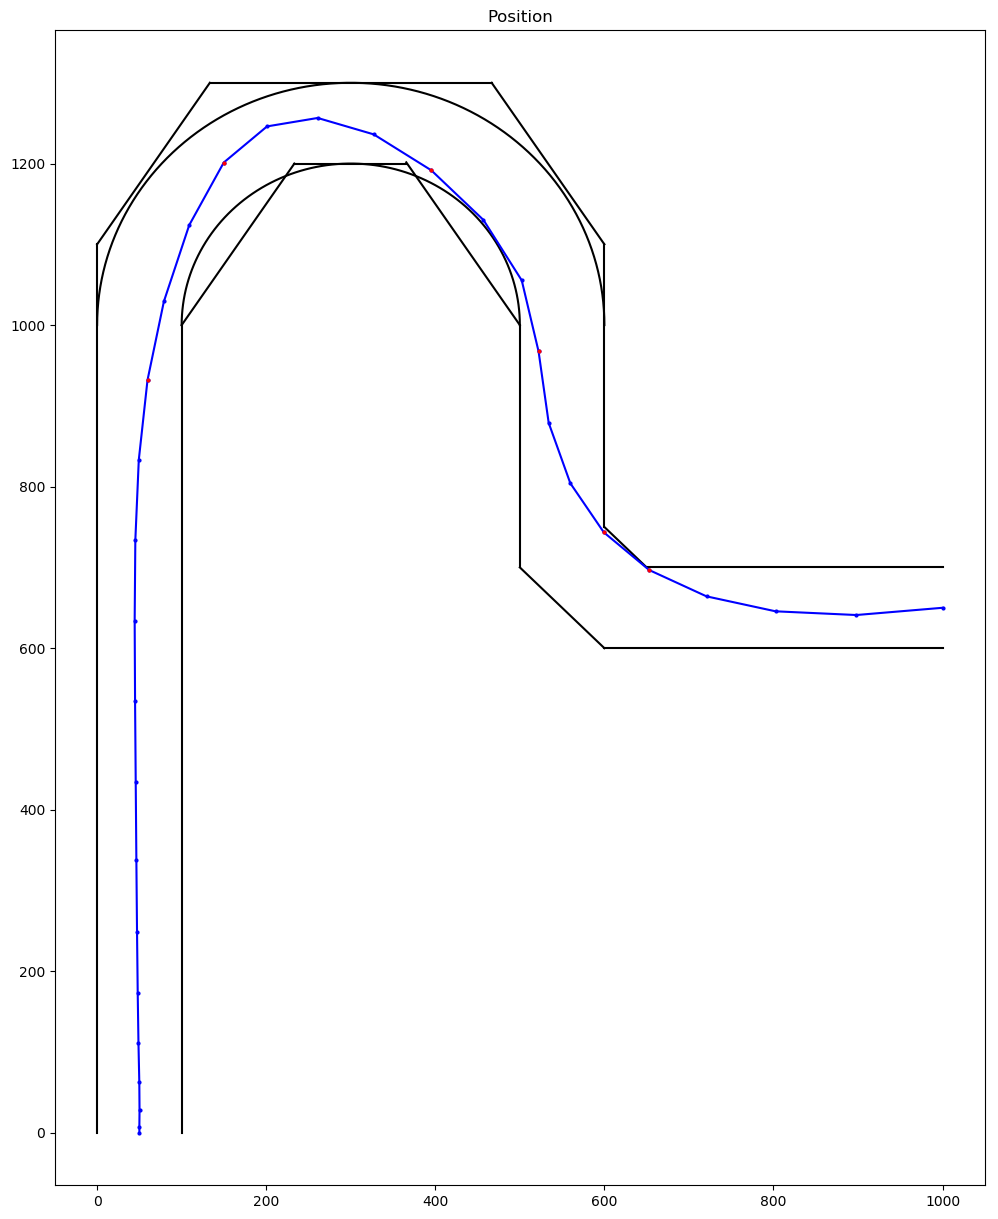

Academic license - for non-commercial use only


In [1]:
using JuMP, Gurobi, Mosek, PyPlot
coflo = 0.2 #coeffecient of friction longitudnal(in direction of motion)
cofla = 0.4 #coeffecient of friction lattitudnal(perpendicular to direction of motion of the front tyers when they turn)


## car specs all specs in meters and seconds
# mass = 1000 # in kg
g = 9.8  # gravitational pull in m/sec^2
maxacc = 14.2  # max acc in m/sec^2
maxv = 103.5 # max velocity in m/sec equivalent to 200km/hr
maxTu = 1.27 #max steer one side

k = 32
startPos = [50,0]
finishPos = [1000, 650]
startVel = [0,0]
finishVel = [0,0]
finishAcc = [0,0]


    # define waypoints
    m = Model(solver = GurobiSolver(OutputFlag=0))
#     m = Model(solver = MosekSolver(LOG=0))
    
    @variable(m, P[1:2,1:k])  # resulting position in x,y
    @variable(m, v[1:2,1:k])
    @variable(m, -(2.75*maxacc) <= Acc[1:2,1:k] <= maxacc )

    # satisfy the dynamics (with zero initial velocity)
    @constraint(m, P[:,1] .== startPos)
    @constraint(m, P[:,k] .== finishPos)
    @constraint(m, v[:,1] .== startVel)
    # @constraint(m, v[:,k] .== finishVel)
    # @constraint(m, AccDM[:,k] .== finishAcc)
    @expression(m, finishDistance, sum((P[i,k]-finishPos[i])^2 for i in 1:2))


    for t in 1:14
        @constraint(m, P[1,t] <= 100)
    end
    for t in 1:25
        @constraint(m, P[2,t] <= -(3/2)*P[1,t] + 1900)
    end
    for t in 15:16
        @constraint(m, P[2,t] >= 50+(3/2)*P[1,t] + 850)
    end
    for t in 17:19
        @constraint(m, P[2,t] >= 1200)
#         @constraint(m, P[2,t] >= -(3/2)*P[1,t] + 1750)
    end
    for t in 21:24
        @constraint(m, P[2,t] >= -(3/2)*P[1,t] + 1750)
    end
    for t in 24:27
        @constraint(m, P[1,t] >= 500)
         @constraint(m, P[1,t] <= 600)

    end
    for t in 28
        @constraint(m, P[1,t] >= 500)
        @constraint(m, P[2,t] <= -1*P[1,t] + 1350)
        @constraint(m, P[2,t] >= -1*P[1,t] + 1200)
    end
    for t in 29:k
        @constraint(m, P[2,t] <=700)
        @constraint(m, P[2,t] >= 600)
    end


    for t in 1:k
        @constraint(m, (v[1,t]^2)+(v[2,t]^2) <= maxv^2)
        @constraint(m, P[1,t] >= 0)
        @constraint(m, P[1,t] <= 1001)
        @constraint(m, P[2,t] >= 0)
        @constraint(m, P[2,t] <= 2300)
        @constraint(m, P[2,t] <= (3/2)*P[1,t] + 1100)
        @constraint(m, P[2,t] <= 1300)
    end

    for t in 1:k-1
#         @constraint(m, Acc[:,t+1] .== Acc[:,t] 
        @constraint(m, v[1,t+1] == v[1,t] + Acc[1,t])
        @constraint(m, v[2,t+1] == v[2,t] + Acc[2,t])
        @constraint(m, P[1,t+1] == P[1,t] + v[1,t] + (.5)*(Acc[1,t]) )
        @constraint(m, P[2,t+1] == P[2,t] + v[2,t] + (.5)*(Acc[2,t])  )   
    end


                
                
     @objective(m, Min, finishDistance)               
    solve(m)
    
rad = linspace(0,π,100) 

x = 300 + 300*cos.(rad)
y = 1000 +300*sin.(rad)
x1 = 300 + 200*cos.(rad)
y1 = 1000 + 200*sin.(rad)

x2 = linspace(0,133.33,100)
x3 = linspace(100,233.33,100)
x4 = linspace(233.33,365.66,100)
x5 = linspace(133.33,466.66,100)
x6 = linspace(365.66,500,100)
x7 = linspace(466.66,600,100)
x8 = linspace(500,600,100)
x9 = linspace(600,650,100)
x10 = linspace(600,1000,100)
x11 = linspace(650,1000,100)

y2 = (3/2)*x2 + 1100
y3 = (3/2)*x3 + 850
y4 = 0*x4 + 1200
y5 = 0*x5 + 1300
y6 = -(3/2)*x6 + 1750
y7 = -(3/2)*x7 + 2000
y8 = -x8 + 1200
y9 = -x9 + 1350
y10 = 0*x11 + 600
y11 = 0*x11 + 700

Llinex = [0, 0]
Lliney = [0, 1100]
LMlinex = [100,100]
LMliney = [0,1000]
RMlinex = [500, 500]
RMliney = [700,1000]
Rlinex = [600,600]
Rliney = [750,1100]

figure(figsize=(12,15))
title("Position")

plot(Llinex[:],Lliney[:], color = "#000000", markersize=4 )
plot(LMlinex[:],LMliney[:],color = "#000000", markersize=4 )
plot(RMlinex[:],RMliney[:], color = "#000000", markersize=4 )
plot(Rlinex[:],Rliney[:], color = "#000000", markersize=4 )
plot(x,y, color = "#000000", markersize=4 )
plot(x1,y1, color = "#000000", markersize=4 )
plot(x2,y2, color = "#000000", markersize=4 )
plot(x3,y3, color = "#000000", markersize=4 )
plot(x4,y4, color = "#000000", markersize=4 )
plot(x5,y5, color = "#000000", markersize=4 )
plot(x6,y6, color = "#000000", markersize=4 )
plot(x7,y7, color = "#000000", markersize=4 )
plot(x8,y8, color = "#000000", markersize=4 )
plot(x9,y9, color = "#000000", markersize=4 )
plot(x10,y10, color = "#000000", markersize=4 )
plot(x11,y11, color = "#000000", markersize=4 )

plot( getvalue(P[1,:]), getvalue(P[2,:]), "b.-", markersize=4 );

    plot( getvalue(P[1,14]), getvalue(P[2,14]), "r.", markersize=4 );
    plot( getvalue(P[1,17]), getvalue(P[2,17]), "r.", markersize=4 );
    plot( getvalue(P[1,21]), getvalue(P[2,21]), "r.", markersize=4 );
    plot( getvalue(P[1,24]), getvalue(P[2,24]), "r.", markersize=4 );
    plot( getvalue(P[1,27]), getvalue(P[2,27]), "r.", markersize=4 );
    plot( getvalue(P[1,28]), getvalue(P[2,28]), "r.", markersize=4 );